In [1]:
# notebooks/Model_Training_NN.ipynb

# Instalación de dependencias necesarias
!pip install pandas numpy scikit-learn tensorflow


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\ealda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import os

In [3]:
# Crear directorios para guardar modelos si no existen
os.makedirs('../models', exist_ok=True)
os.makedirs('../reports', exist_ok=True)

In [4]:
# Cargar los datos
train_data = pd.read_csv('../data/train.csv')

In [5]:
# Preprocesamiento de datos: Imputación de valores nulos en columnas numéricas
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
train_data_imputed = train_data.copy()
train_data_imputed[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())

In [6]:
# Selección de características y variable objetivo
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
target = 'SalePrice'

In [7]:

X = train_data_imputed[features]
y = train_data_imputed[target]

In [8]:
# Estandarización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
# Definición del modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

C:\Users\ealda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:

# Compilación del modelo
model.compile(optimizer='adam', loss='mse')

In [12]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38640218112.0000 - val_loss: 39653019648.0000
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39342530560.0000 - val_loss: 39650627584.0000
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39679225856.0000 - val_loss: 39644430336.0000
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38808342528.0000 - val_loss: 39631151104.0000
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39053049856.0000 - val_loss: 39607701504.0000
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38780977152.0000 - val_loss: 39570898944.0000
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38165770240.0000 - val_loss: 39518330880.0000
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38974722048.0000 - val_loss: 39447056384.0000
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38960525312.0000 - val_loss: 39353806848.0000
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

In [13]:
# Guardar el modelo entrenado
model.save('../models/nn_model.h5')

In [14]:
# Predicciones y evaluación
y_pred = model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE inicial: {rmse}')

# Guardar los resultados en un archivo
with open('../reports/training_report_nn.txt', 'w') as f:
    f.write(f'RMSE inicial: {rmse}\n')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RMSE inicial: 57006.03743239271


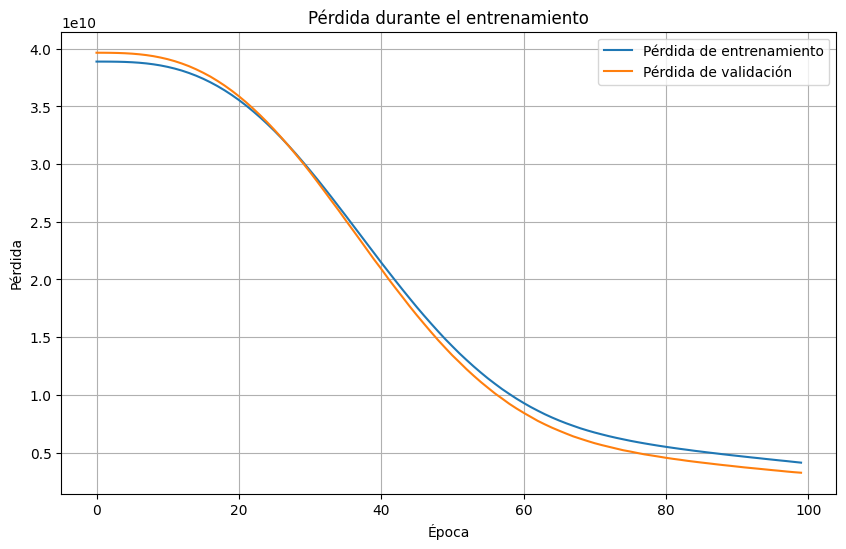

In [17]:
# Gráfica de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.savefig('../reports/loss_curve.png')
plt.show()

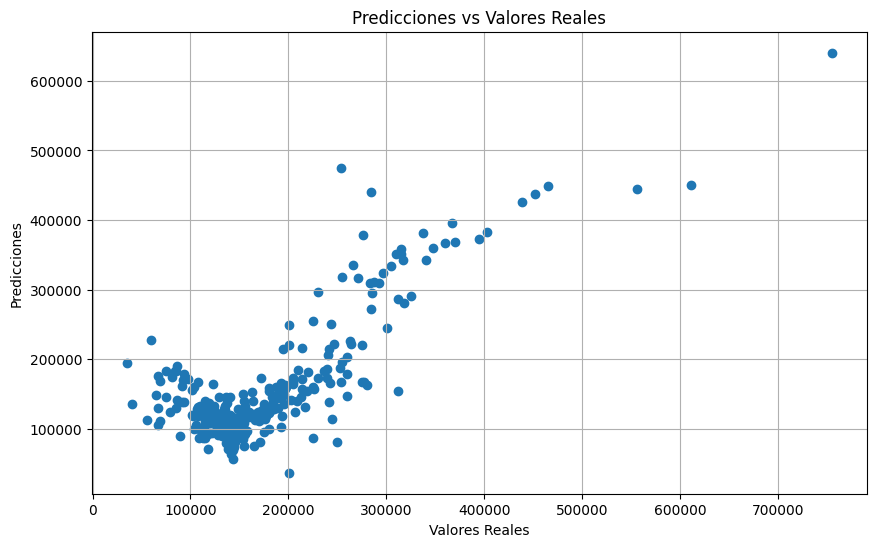

In [18]:
# Gráfica de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.savefig('../reports/pred_vs_real.png')
plt.show()